<a href="https://colab.research.google.com/github/marcocintra/doutorado/blob/main/Reuni%C3%A3o_GFEC_P%26D_com_GPA_06_05_2021_Apresenta%C3%A7%C3%A3o_A3_GPA_1D_An%C3%A1lise_de_S%C3%A9ries_Temporais_(Exs_F%C3%ADsica_Espacial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Instituto Nacional de Pesquisas Espaciais - INPE**
#**Coordenação de Pesquisa Aplicada e Desenvolvimento Tecnológico - COPDT**
#**Programa de Pós-Graduação em Computação Aplicada - PPGCAP**
#**Reunião do Grupo de Física Espacial Computacional (GFEC)**
#**ASSUNTO: P&D com Gradient Pattern Analysis (GPA)**
#**06/05/2021**
#**Apresentação A3 - GPA 1D - Análise de Séries Temporais (Exs. Física Espacial)**
#**Marco Antonio de Ulhôa Cintra (Doutorando CAP-INPE)**


# 1. Introdução 
-----
Este notebook tem por objetivo ensinar como utilizar a biblioteca do GPA, aplicando a técnica em séries temporais (*Gradient Spectral Analysis* - GSA) associadas à Física Espacial. 

Dados que serão utilizados:

* "coi20210101dmin.min": dados de Conteúdo Eletrônico Total (*Total Electronic Content* - TEC) de Janeiro e Fevereiro, adquiridos no aeroporto de Lisboa. As coordenadas (geodésicas em graus decimais) onde está instalado o equipamento (magnetômetro) são as seguintes: latitude: 38,779326008; longitude: -9,139700754; altitude: 174.454; 
* Dados TEC de janeiro processados (01/01/2021);

* Serão processadas 3 séries temporais:
  - 1) TEC (X) - Componente Norte-Sul, do  campo magnético da Terra, da componente horizontal (H) que é derivada de acordo com X = H cos D, e medida em nT;
  - 2) TEC (Y) - Componente Leste-Oeste, do campo magnético da Terra, da componente horizontal (H) que é calculada de Y = H sen D, e medido em nT;
  - 3) TEC (Z) - Componente vertical (Z) que é obtida de Z = F sen I, e medida em nT.  

* Fonte dos dados: CITEUC-OGA-Universidade de Coimbra (fornecidos pela minha coorientadora, Dra. M. Teresa Barata).

# 2. Obtenção e visualização dos dados de TEC
-----


Downloading...
From: https://drive.google.com/uc?id=1NLj9xSA_UbjquERBc_vIHwKvB2vLqjyh
To: /content/coi20210101dmin.min
100% 105k/105k [00:00<00:00, 37.0MB/s]
<bound method NDFrame.head of             DATE          TIME  DOY      COIX    COIY      COIZ      COIF   |
0     2021-01-01  00:00:00.000    1  25812.02 -780.68  36297.71  44551.96 NaN
1     2021-01-01  00:01:00.000    1  25812.06 -780.71  36297.69  44552.00 NaN
2     2021-01-01  00:02:00.000    1  25812.20 -780.82  36297.65  44552.00 NaN
3     2021-01-01  00:03:00.000    1  25812.20 -780.75  36297.67  44552.06 NaN
4     2021-01-01  00:04:00.000    1  25812.18 -780.56  36297.74  44552.09 NaN
...          ...           ...  ...       ...     ...       ...       ...  ..
1435  2021-01-01  23:55:00.000    1  25813.99 -782.10  36295.24  44551.68 NaN
1436  2021-01-01  23:56:00.000    1  25813.93 -782.09  36295.20  44551.67 NaN
1437  2021-01-01  23:57:00.000    1  25813.71 -782.08  36295.22  44551.51 NaN
1438  2021-01-01  23:58:00.000  

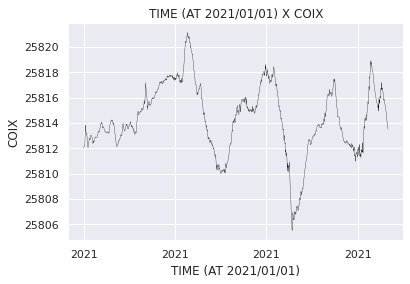

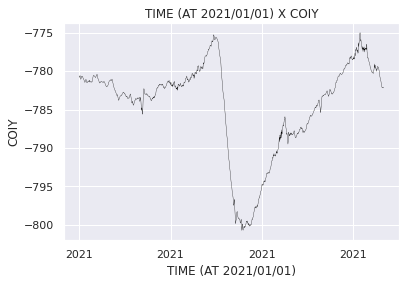

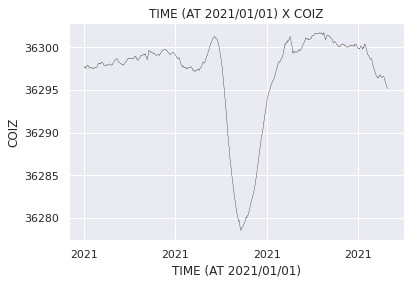

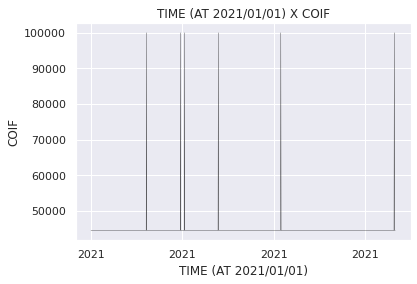

In [34]:
!gdown --id 1NLj9xSA_UbjquERBc_vIHwKvB2vLqjyh
import pandas as pd
from datetime import datetime
df = pd.read_csv('/content/coi20210101dmin.min', delim_whitespace=True, parse_dates=True, skiprows=19)
print(df.head)

df['DATE'] = df['DATE'] + " " + df['TIME']
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d %H:%M:%S.%f')

del df['TIME']
del df['|']
del df['DOY']

DATE = df['DATE']
COIX = df['COIX']
COIX = COIX.to_numpy()
COIY = df['COIY']
COIY = COIY.to_numpy()
COIZ = df['COIZ']
COIZ= COIZ.to_numpy()

import numpy as np
COIX = df['COIX'].values
COIY = df['COIY'].values
COIZ = df['COIZ'].values
print(np.shape(COIX))
print(np.shape(COIY))
print(np.shape(COIZ))

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.plot(DATE, COIX, linewidth = 0.3, color='black')
plt.title("TIME (AT 2021/01/01) X COIX")
plt.xlabel("TIME (AT 2021/01/01)")
plt.ylabel("COIX")
plt.show()
plt.close()

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.plot(DATE, COIY, linewidth = 0.3, color='black')
plt.title("TIME (AT 2021/01/01) X COIY")
plt.xlabel("TIME (AT 2021/01/01)")
plt.ylabel("COIY")
plt.show()
plt.close()

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.plot(DATE, COIZ, linewidth = 0.3, color='black')
plt.title("TIME (AT 2021/01/01) X COIZ")
plt.xlabel("TIME (AT 2021/01/01)")
plt.ylabel("COIZ")
plt.show()
plt.close()

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

#3. Aplicação do GPA (GSA) em dados 1D - Séries Temporais 
*   Versão atual e constantemente atualizada gerenciado pelo Rubens Sautter - https://github.com/rsautter/GPA
*   Versão que utilizei no Mestrado (também obtida do GitHub do Rubens Sautter), porém utilizando apenas o Momento Gradiente G2 e também aplicando em mini matrizes - https://github.com/marcocintra/mestrado
* Será utilizada a última versão do GPA neste exemplo, utilizando momentos gradientes G1, G2 e G3
* Fonte de alguns códigos a seguir relativamente a usos básicos do GPA: https://github.com/rsautter/GPA/blob/master/Examples/FundamentalMatrix.ipynb  



In [35]:
#Biblioteca do GPA
!pip install git+https://github.com/rsautter/GPA

#Bibliotecas de manipulação de vetores, plotagem e o próprio GPA
import GPA
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
import matplotlib.patches as mpatches

#Utilizando o GPA
ga = GPA.GPA(0.08)
ga.version()

  Cloning https://github.com/rsautter/GPA to /tmp/pip-req-build-4t9v99p1
  Running command git clone -q https://github.com/rsautter/GPA /tmp/pip-req-build-4t9v99p1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for GPA: filename=GPA-3.2-cp37-cp37m-linux_x86_64.whl size=920486 sha256=d0b92103e031e29ae68756d3862e9bc429aa9bc4fd30e2edcb5dc755a2135760
  Stored in directory: /tmp/pip-ephem-wheel-cache-afnkmfce/wheels/53/e8/31/3a4b685df72633b43063bc73e03cc56a3f4350eaba6c7c7180
Successfully built GPA


b'GPA - 3.2'

# 3.1 Pré-processamentos/conversão das séries temporais em matrizes para a aplicação do GPA (GSA)
-----
As 3 séries temporais de TEC possuem 1440 pontos. É necessário converter a série para uma matriz quadrada. Para isso, será necessário primeiramente redimensionar a série para um número de pontos mais próximo do número que tenha raíz quadrada inteira, no caso, 1369 pontos = matriz quadrada 37 x 37. A seguir, serão plotadas essas matrizes para simples visualização da distribuição dos dados.

(37, 37)
(37, 37)
(37, 37)


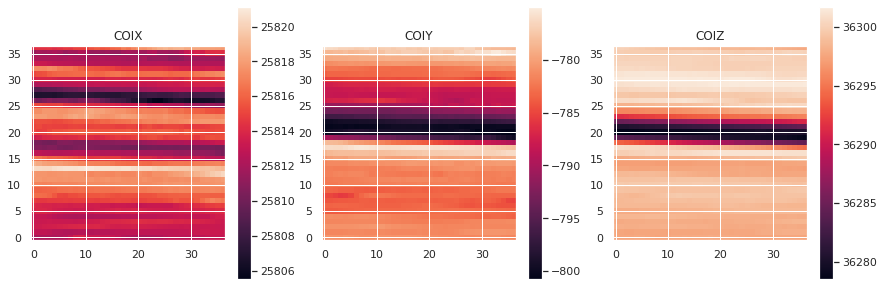

In [38]:
COIX = COIX[:1369]
COIY = COIY[:1369]
COIZ = COIZ[:1369]

tamanhoserieCOIX = np.shape(COIX)
print(tamanhoserieCOIX)
tamanhoserieCOIY = np.shape(COIY)
print(tamanhoserieCOIY)
tamanhoserieCOIZ = np.shape(COIZ)
print(tamanhoserieCOIZ)


#1440 pontos
#38*38 = 1444
#37*37 = 1369

COIX = list(COIX.reshape(-1, 37))
COIY = list(COIY.reshape(-1, 37))
COIZ = list(COIZ.reshape(-1, 37))

COIX = np.array(COIX).astype(np.float)
COIY = np.array(COIY).astype(np.float)
COIZ = np.array(COIZ).astype(np.float)

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(COIX,origin='lower')
plt.colorbar()
plt.title("COIX")

plt.subplot(1,4,2)
plt.imshow(COIY,origin='lower')
plt.colorbar()
plt.title("COIY")

plt.subplot(1,4,3)
plt.imshow(COIZ,origin='lower')
plt.colorbar()
plt.title("COIZ")

plt.show()

3.2 Processamentos do GPA em Séries Temporais de TEC.

Após o pré-processamento dos dados

O método "ga" realiza a medida dos momentos do campo gradiente. Há três parâmetros:

- "mat" - A matriz de entrada do tipo float
- "moment" - Lista de momentos do campo gradiente a serem medidos ('G1','G2','G3' ou 'G4')
- "symmetrycalGrad" - Determina se a medida será realizada sobre o campo simétrico, codificado como:
- "S" - campo simétrico
- "A" - campo assimétrico
- "F" - campo gradiente completo

Por padrão os parâmetros são:
- moment = "['G2']"
- symmetrycalGrad = "A"

In [39]:
momentsCOIX = ga(COIX, moment=['G1','G2','G3'],symmetrycalGrad='A')
momentsCOIX = {key : round(momentsCOIX[key], 3) for key in momentsCOIX}
print("Momentos do campo gradiente assimétrico do COIX:",momentsCOIX)
momentsCOIX = ga(COIX, moment=['G1','G2','G3'],symmetrycalGrad='S')
momentsCOIX = {key : round(momentsCOIX[key], 3) for key in momentsCOIX}
print("Momentos do campo gradiente simétrico do COIX:",momentsCOIX)
momentsCOIX = ga(COIX, moment=['G1','G2','G3'],symmetrycalGrad='F')
momentsCOIX = {key : round(momentsCOIX[key], 3) for key in momentsCOIX}
print("Momentos do campo gradiente completo do COIX:",momentsCOIX)

print("\n\n\n")

momentsCOIY = ga(COIY, moment=['G1','G2','G3'],symmetrycalGrad='A')
momentsCOIY = {key : round(momentsCOIY[key], 3) for key in momentsCOIY}
print("Momentos do campo gradiente assimétrico do COIY:",momentsCOIY)
momentsCOIY = ga(COIY, moment=['G1','G2','G3'],symmetrycalGrad='S')
momentsCOIY = {key : round(momentsCOIY[key], 3) for key in momentsCOIY}
print("Momentos do campo gradiente simétrico do COIY:",momentsCOIY)
momentsCOIY = ga(COIY, moment=['G1','G2','G3'],symmetrycalGrad='F')
momentsCOIY = {key : round(momentsCOIY[key], 3) for key in momentsCOIY}
print("Momentos do campo gradiente completo do COIY:",momentsCOIY)

print("\n\n\n")

momentsCOIZ = ga(COIZ, moment=['G1','G2','G3'],symmetrycalGrad='A')
momentsCOIZ = {key : round(momentsCOIZ[key], 3) for key in momentsCOIZ}
print("Momentos do campo gradiente assimétrico do COIZ:",momentsCOIZ)
momentsCOIZ = ga(COIZ, moment=['G1','G2','G3'],symmetrycalGrad='S')
momentsCOIZ = {key : round(momentsCOIZ[key], 3) for key in momentsCOIZ}
print("Momentos do campo gradiente simétrico do COIZ:",momentsCOIZ)
momentsCOIZ = ga(COIZ, moment=['G1','G2','G3'],symmetrycalGrad='F')
momentsCOIZ = {key : round(momentsCOIZ[key], 3) for key in momentsCOIZ}
print("Momentos do campo gradiente completo do COIZ:",momentsCOIZ)

print("\n\n\n")


Momentos do campo gradiente assimétrico do COIX: {'G1': 1.68, 'G2': 0.097, 'G3': 0.59}
Momentos do campo gradiente simétrico do COIX: {'G1': 1.981, 'G2': 1.961, 'G3': 1.435}
Momentos do campo gradiente completo do COIX: {'G1': 1.986, 'G2': 1.882, 'G3': 1.466}




Momentos do campo gradiente assimétrico do COIY: {'G1': 1.885, 'G2': 0.26, 'G3': 0.734}
Momentos do campo gradiente simétrico do COIY: {'G1': 1.977, 'G2': 1.98, 'G3': 1.498}
Momentos do campo gradiente completo do COIY: {'G1': 1.984, 'G2': 1.937, 'G3': 1.628}




Momentos do campo gradiente assimétrico do COIZ: {'G1': 1.898, 'G2': 0.381, 'G3': 0.754}
Momentos do campo gradiente simétrico do COIZ: {'G1': 1.946, 'G2': 1.921, 'G3': 1.386}
Momentos do campo gradiente completo do COIZ: {'G1': 1.986, 'G2': 1.987, 'G3': 1.422}




